In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:

# Load the dataset
df = pd.read_csv(r"D:\DA Portfolio\Students Performance Dataset\Student_performance_data _.csv")

# Inspect the first few rows
print(df.head())


   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1             0  3

In [5]:
# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values as appropriate
df = df.ffill()  # or use .dropna() if you prefer to remove rows with missing values

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


In [4]:
# Convert categorical columns to categorical data types
categorical_columns = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport',
                       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Convert Age to numeric (if it's not already)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')


In [5]:
# Summary statistics for numeric columns
print(df.describe())

# Summary statistics for categorical columns
print(df.describe(include=['category']))


         StudentID          Age  StudyTimeWeekly     Absences          GPA
count  2392.000000  2392.000000      2392.000000  2392.000000  2392.000000
mean   2196.500000    16.468645         9.771992    14.541388     1.906186
std     690.655244     1.123798         5.652774     8.467417     0.915156
min    1001.000000    15.000000         0.001057     0.000000     0.000000
25%    1598.750000    15.000000         5.043079     7.000000     1.174803
50%    2196.500000    16.000000         9.705363    15.000000     1.893393
75%    2794.250000    17.000000        14.408410    22.000000     2.622216
max    3392.000000    18.000000        19.978094    29.000000     4.000000
        Gender  Ethnicity  ParentalEducation  Tutoring  ParentalSupport  \
count     2392       2392               2392      2392             2392   
unique       2          4                  5         2                5   
top          1          0                  2         0                2   
freq      1222       1207

C:\Users\Administrator\AppData\Local\Temp\ipykernel_24916\421515057.py:6: UserWarning: When passing multiple axes, layout keyword is ignored.
  df[num_cols].hist(bins=30, ax=axes, layout=(2, 2))


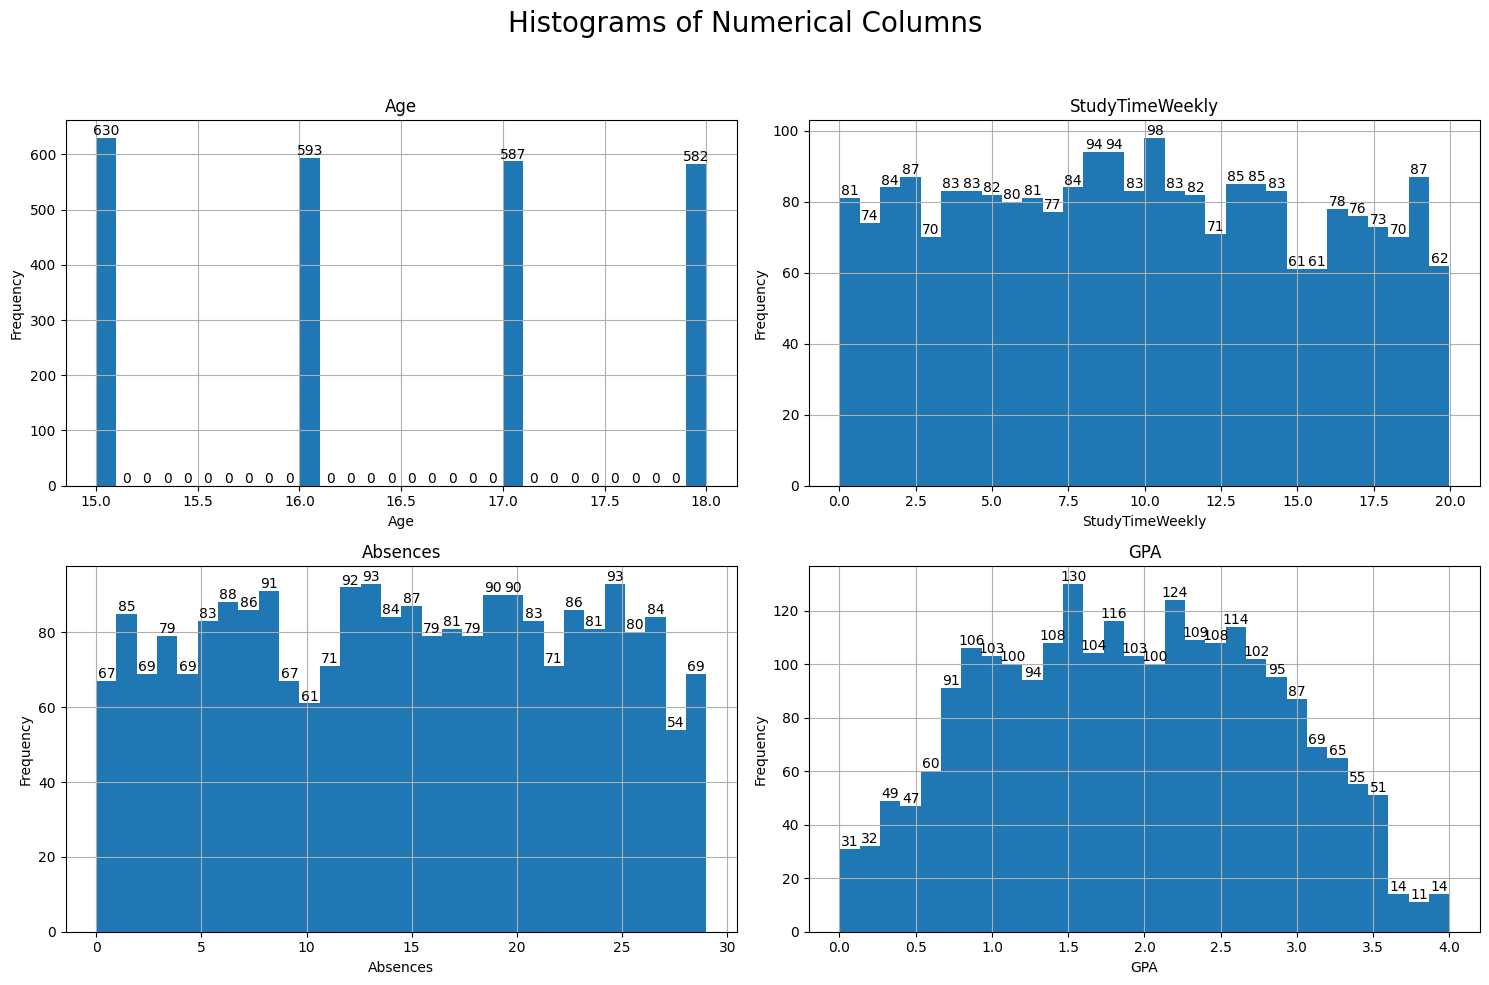

In [6]:

# List of numerical columns
num_cols = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']

# Create histograms for numerical data
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
df[num_cols].hist(bins=30, ax=axes, layout=(2, 2))

# Add a main title
plt.suptitle('Histograms of Numerical Columns', fontsize=20)

# Loop through axes to add titles and labels
for i, ax in enumerate(axes.flat):
    ax.set_title(num_cols[i])
    ax.set_xlabel(num_cols[i])
    ax.set_ylabel('Frequency')
    
    # Annotate each bar with its height
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Adjust layout and display the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

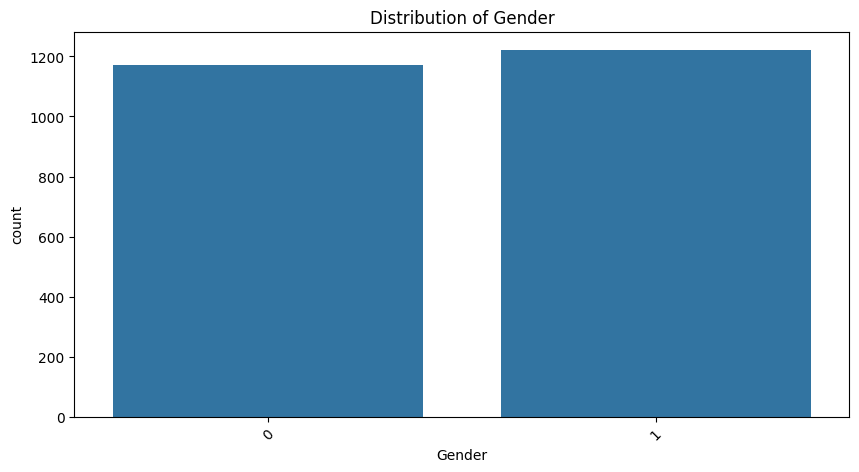

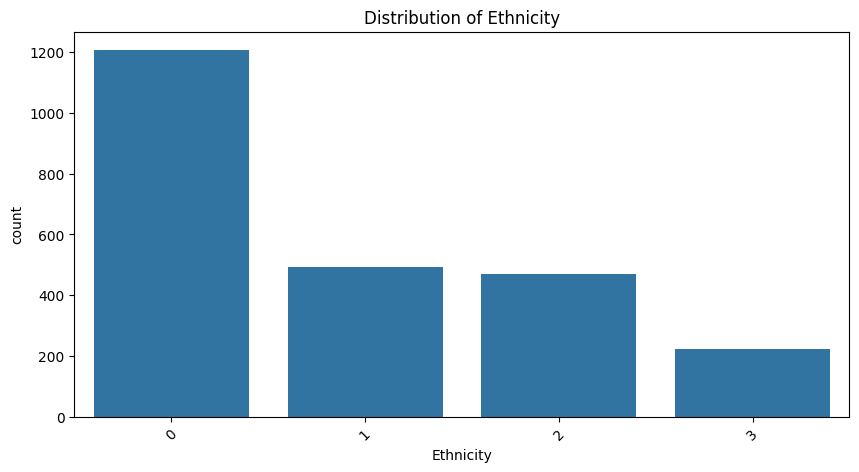

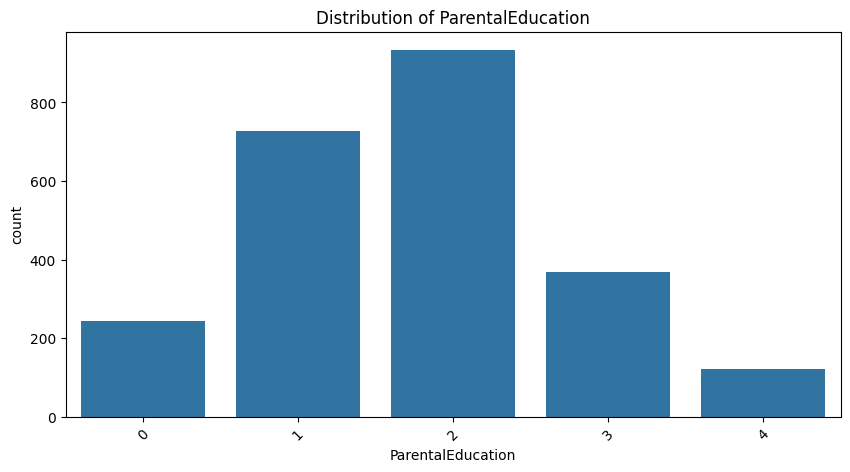

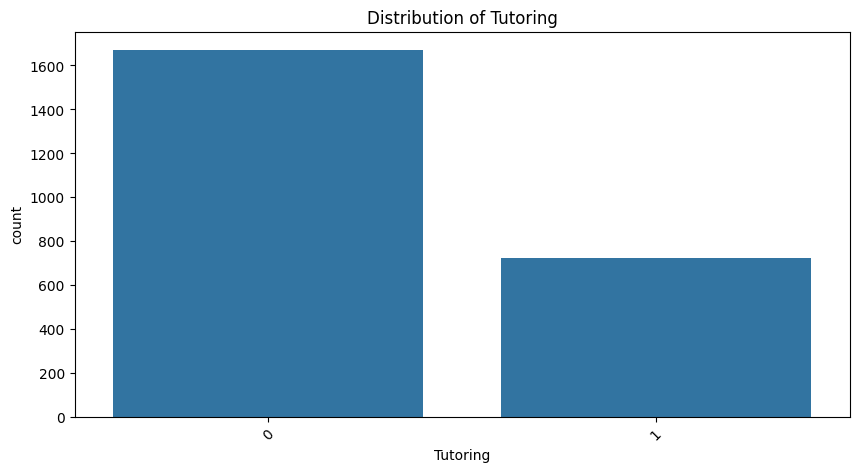

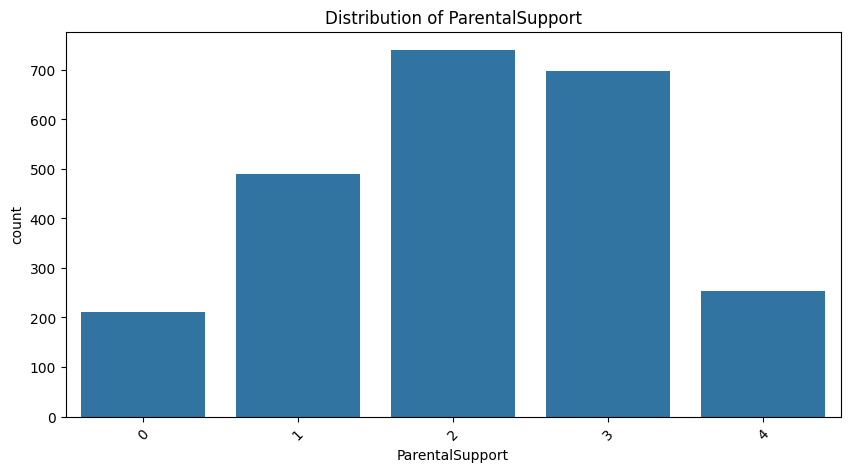

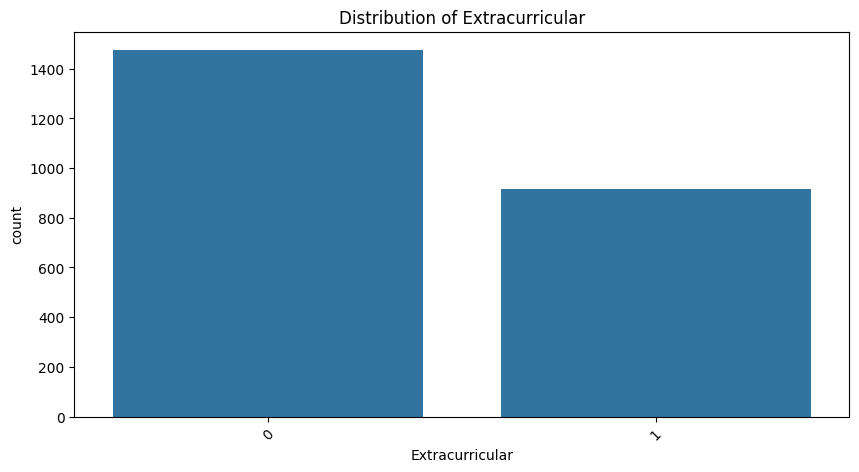

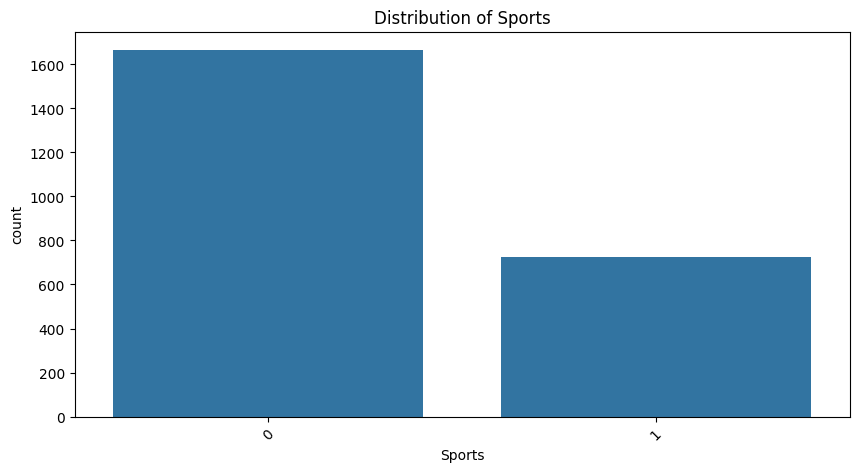

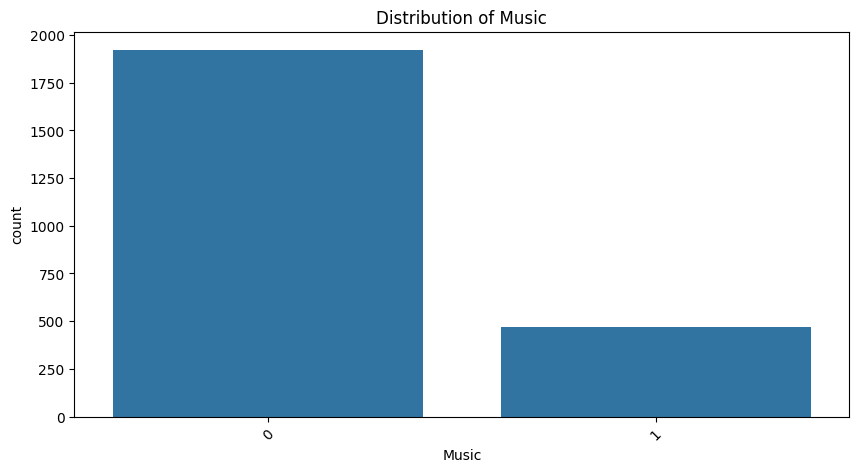

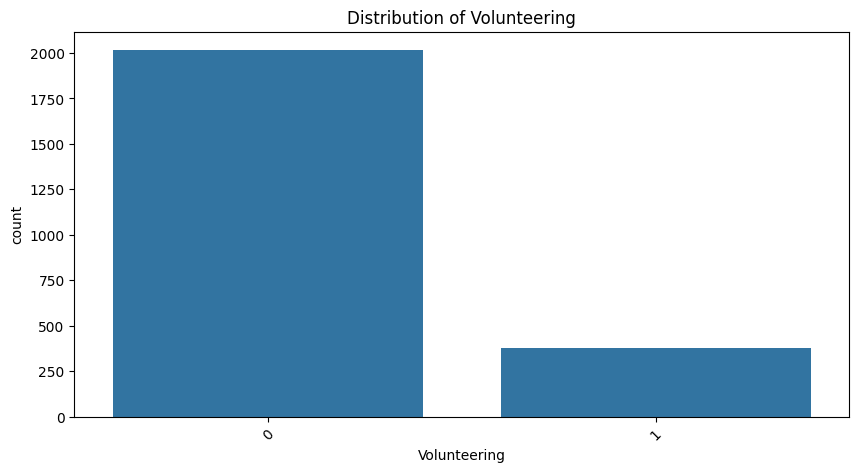

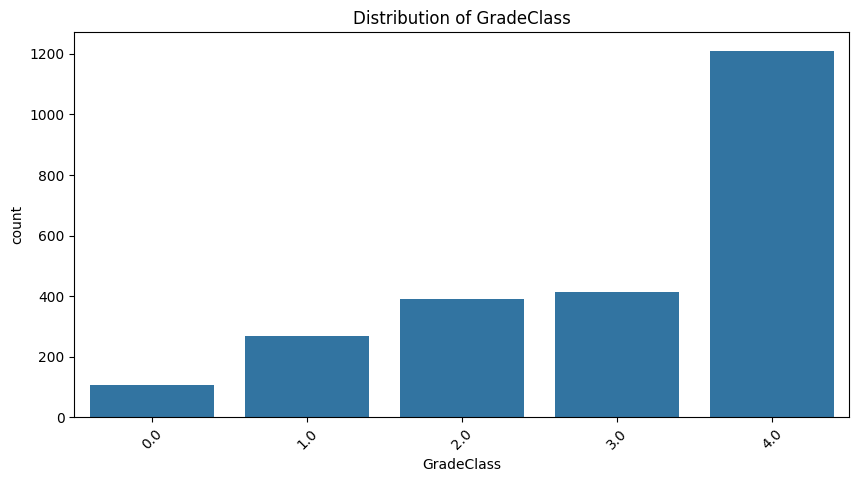

In [21]:
# Distribution of categorical data
for col in ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

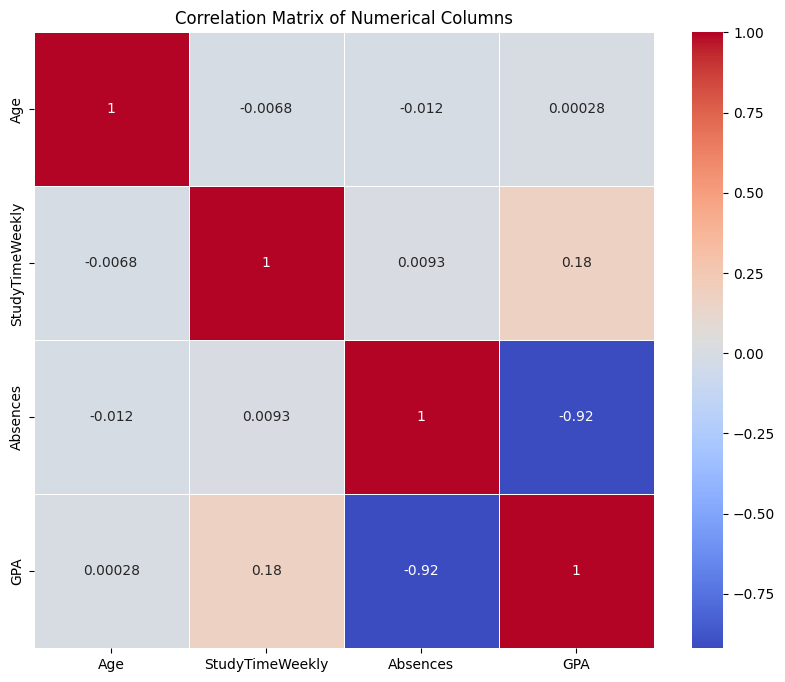

In [22]:
# Compute correlation matrix for numeric columns
corr_matrix = df[num_cols].corr()

# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()


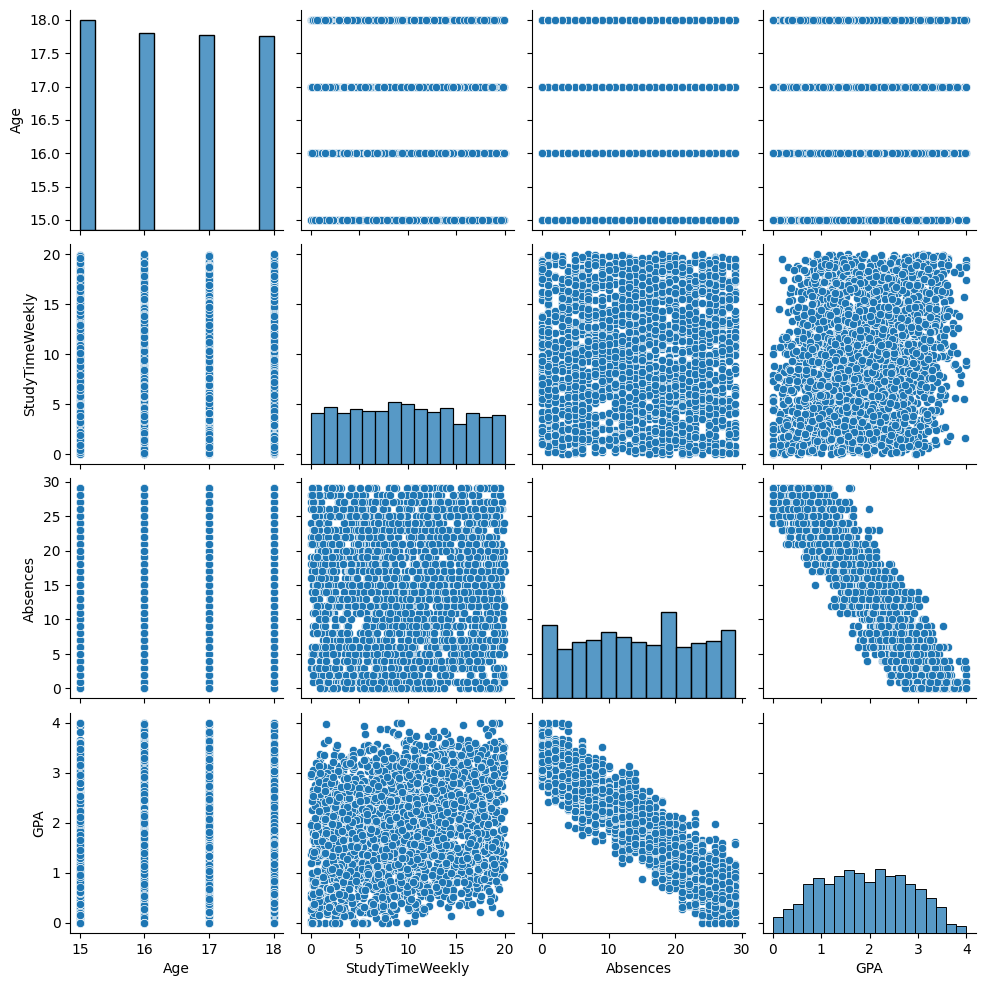

In [7]:
# Pairplot for numeric columns
sns.pairplot(df[num_cols])
plt.show()


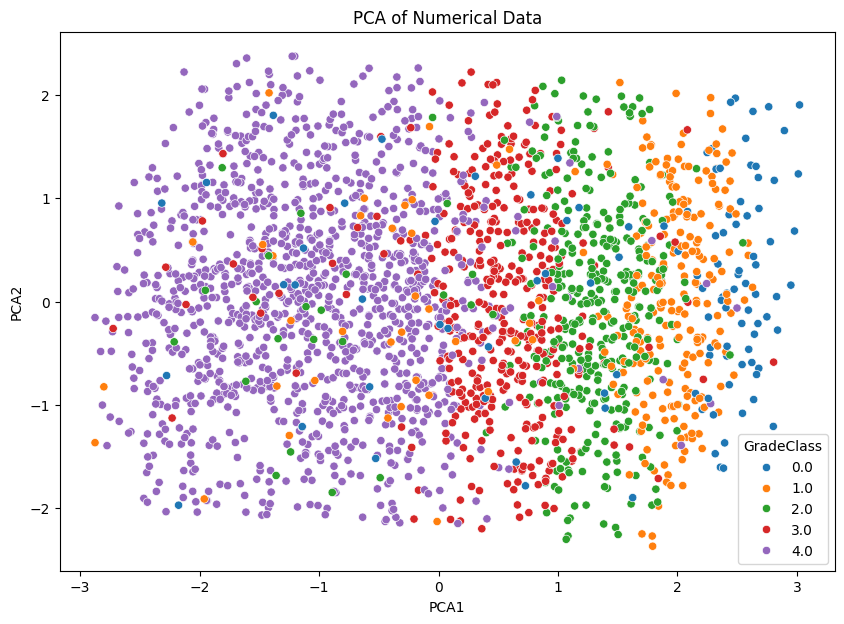

In [8]:
# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[num_cols].dropna())

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Add PCA results to DataFrame
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Plot PCA results
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='GradeClass', data=df)
plt.title('PCA of Numerical Data')
plt.show()


Crosstab of Gender vs GradeClass:
 GradeClass  0.0  1.0  2.0  3.0  4.0
Gender                             
0            58  132  197  201  582
1            49  137  194  213  629

Crosstab of Ethnicity vs GradeClass:
 GradeClass  0.0  1.0  2.0  3.0  4.0
Ethnicity                          
0            47  136  198  194  632
1            24   59   79   91  240
2            27   47   76   86  234
3             9   27   38   43  105

Crosstab of ParentalEducation vs GradeClass:
 GradeClass         0.0  1.0  2.0  3.0  4.0
ParentalEducation                         
0                   11   27   42   39  124
1                   30   85  127  136  350
2                   48  108  156  150  472
3                   16   40   53   67  191
4                    2    9   13   22   74

Crosstab of Tutoring vs GradeClass:
 GradeClass  0.0  1.0  2.0  3.0  4.0
Tutoring                           
0            55  160  273  301  882
1            52  109  118  113  329

Crosstab of ParentalSupport vs Gra

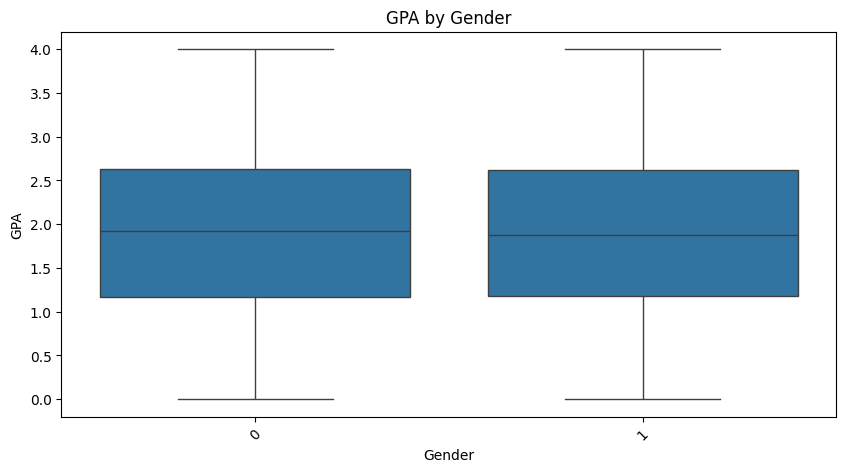

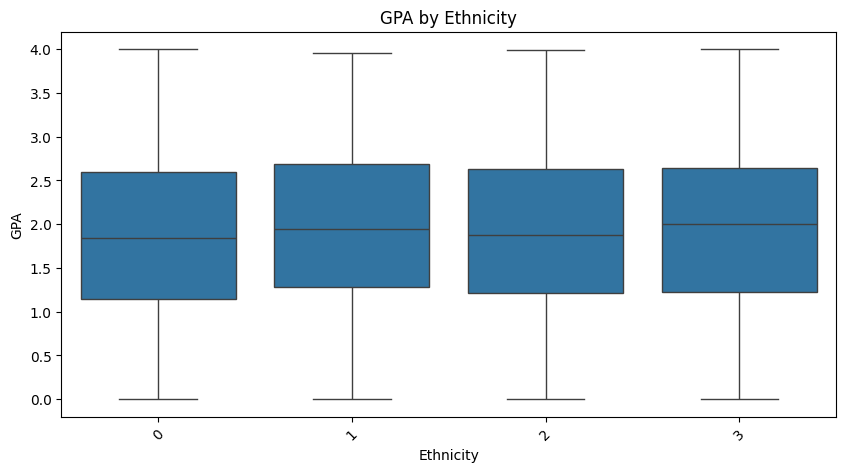

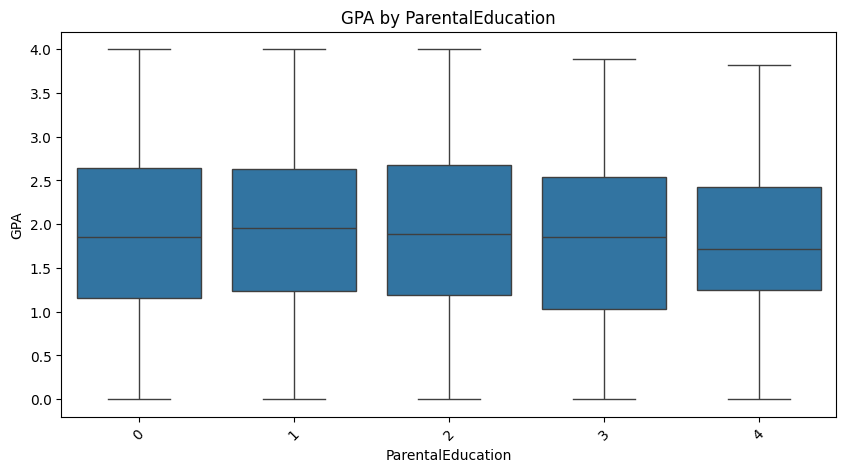

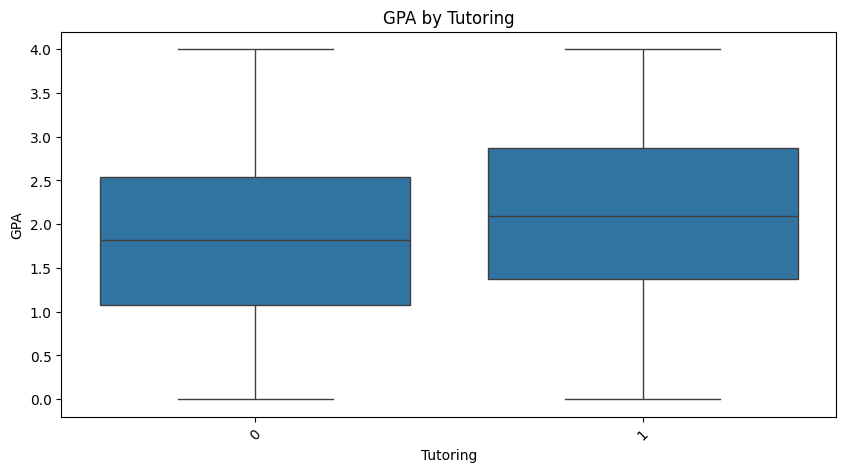

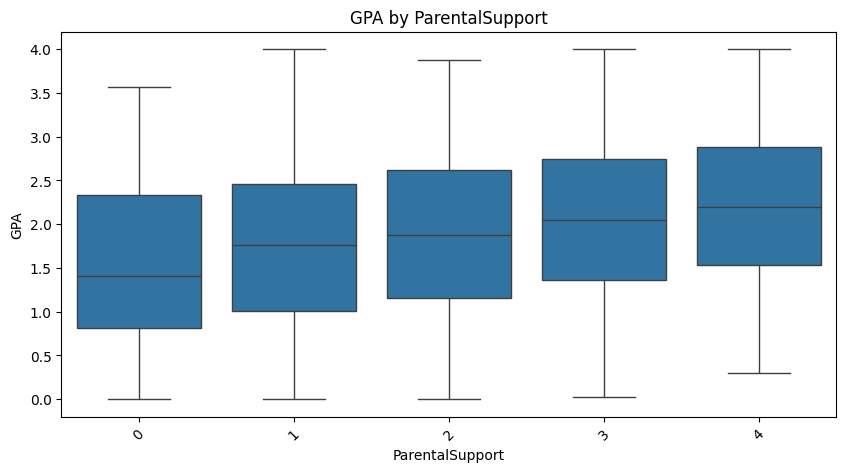

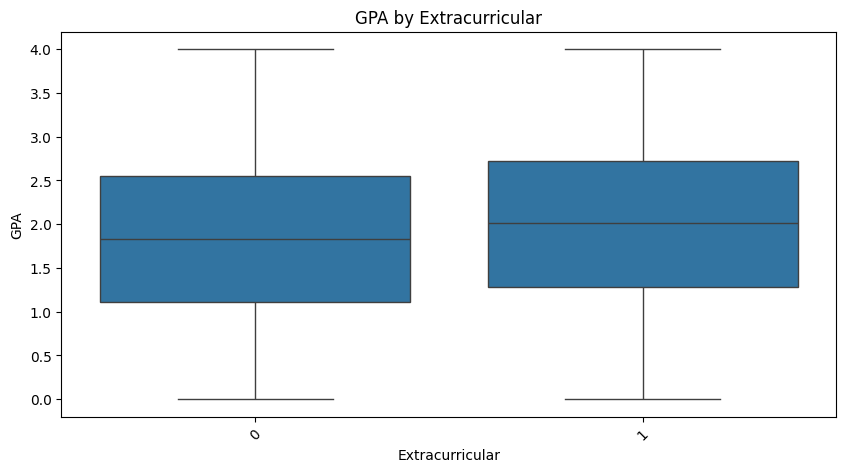

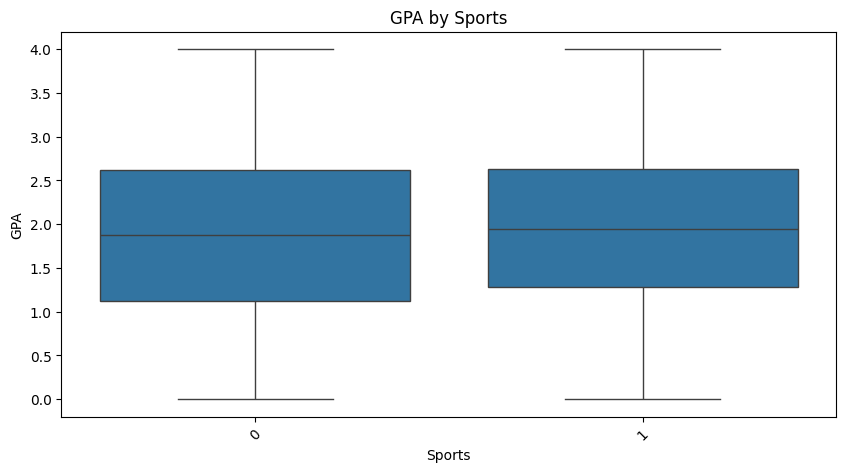

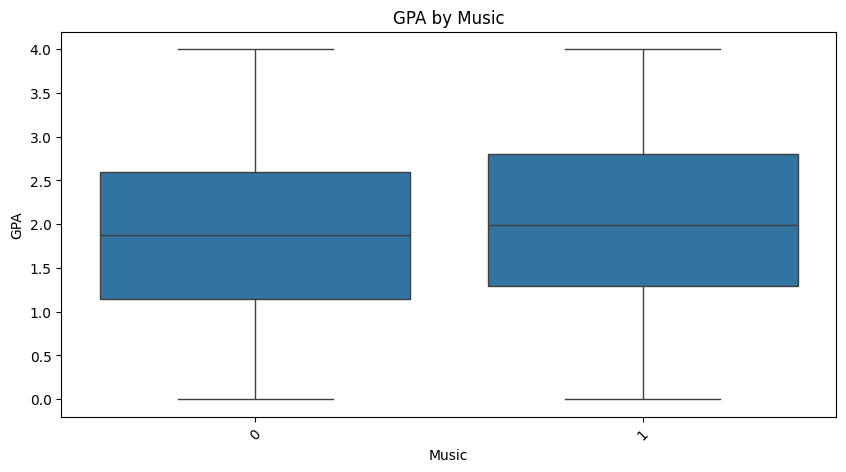

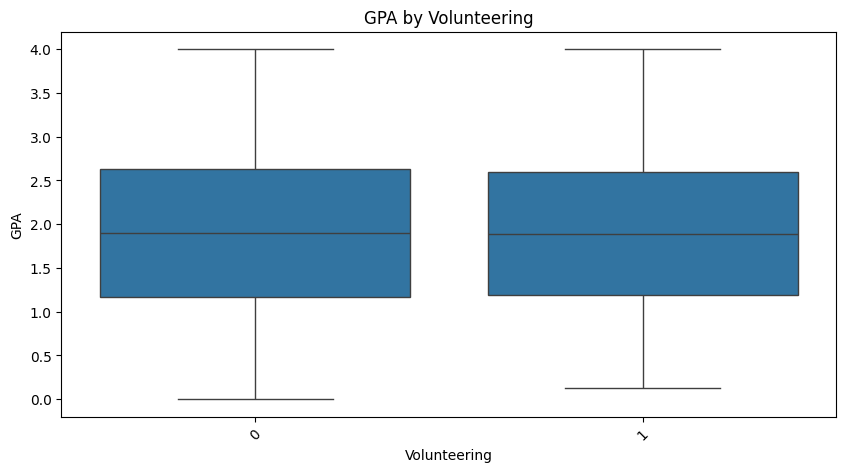

In [28]:
# Crosstabs and groupby for categorical analysis
for col in ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
            'Music', 'Volunteering']:
    crosstab = pd.crosstab(df[col], df['GradeClass'])
    print(f'\nCrosstab of {col} vs GradeClass:\n', crosstab)

# Analysis of GPA by categorical variables
for col in ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
            'Music', 'Volunteering']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=col, y='GPA', data=df)
    plt.title(f'GPA by {col}')
    plt.xticks(rotation=45)
    plt.show()


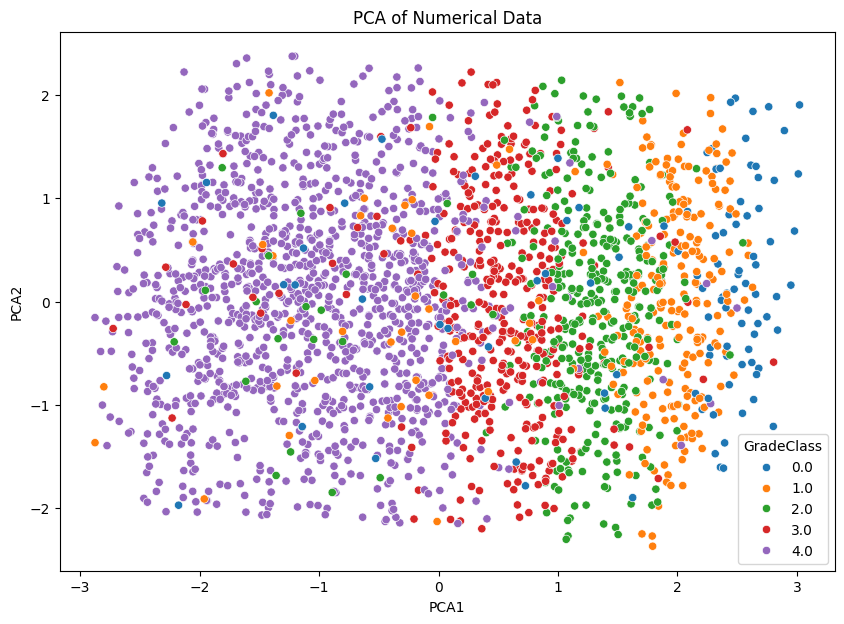

In [29]:
# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[num_cols].dropna())

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Add PCA results to DataFrame
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Plot PCA results
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='GradeClass', data=df)
plt.title('PCA of Numerical Data')
plt.show()

In [30]:
# Prepare features and target variable
X = df[['Age', 'StudyTimeWeekly', 'Absences']]  # Add other relevant features
y = df['GPA']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.10137985716001176
